In [1]:
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt

# # Load data from the pickle file
# data_dict = pickle.load(open('data.pickle', 'rb'))
# data = data_dict['data']
# labels = data_dict['labels']

# # Function to visualize hand landmarks for each class
# def visualize_hand_landmarks_for_class(class_label):
#     print(f"Visualizing hand landmarks for class {class_label}...")
    
#     # Filter data for the specified class label
#     class_data = [data[i] for i, label in enumerate(labels) if label == str(class_label)]
#     print(f"Found {len(class_data)} samples for class {class_label}")

#     # Create scatter plot for hand landmarks of the specified class
#     plt.figure(figsize=(8, 6))
#     for hand_landmarks in class_data:
#         # Split hand landmarks into x and y coordinates
#         x_coords = hand_landmarks[0::2]  # Even indices are x coordinates
#         y_coords = hand_landmarks[1::2]  # Odd indices are y coordinates

#         # Plot hand landmarks
#         plt.scatter(x_coords, y_coords, label=f'Gesture {class_label}')

#     # Set plot title and labels
#     plt.title(f'Hand Landmarks for Class: {class_label}')
#     plt.xlabel('X Coordinate')
#     plt.ylabel('Y Coordinate')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Visualize hand landmarks for each class
# for class_label in range(26):
#     visualize_hand_landmarks_for_class(class_label)


Accuracy on test set for class 25: 1.00


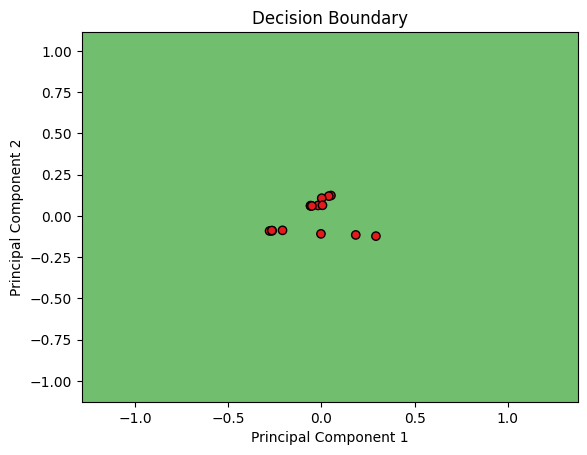

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load data from the pickle file
data_dict = pickle.load(open('data.pickle', 'rb'))
data = np.array(data_dict['data'])
labels = np.array(data_dict['labels'])

# Choose a specific class for visualization
selected_class = 25# Change this to the desired class label

# Filter data for the selected class
selected_class_data = data[labels == str(selected_class)]

# Split the selected class data into training and testing sets
x_train, x_test = train_test_split(selected_class_data, test_size=0.2, random_state=42)

# Train a Random Forest classifier using the selected class data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, np.full((len(x_train),), selected_class))

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(np.full((len(x_test),), selected_class), y_pred)
print(f"Accuracy on test set for class {selected_class}: {accuracy:.2f}")
# Visualize the decision boundary of the trained classifier
def plot_decision_boundary(classifier, X_train, X_test, y_train, y_test):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the classifier on the transformed training data
    classifier.fit(X_train_pca, y_train)

    # Plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    # Plot data points
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary')
    plt.show()

# Visualize decision boundary
plot_decision_boundary(rf_classifier, x_train, x_test, np.full((len(x_train),), selected_class), np.full((len(x_test),), selected_class))


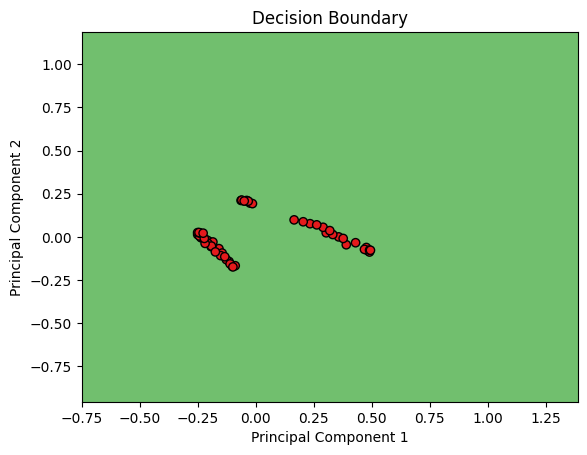

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load data from the pickle file
data_dict = pickle.load(open('data.pickle', 'rb'))
data = np.array(data_dict['data'])
labels = np.array(data_dict['labels'])

# Choose a specific class for visualization
selected_class = 15  # Change this to the desired class label

# Filter data for the selected class
selected_class_data = data[labels == str(selected_class)]

# Split the selected class data into training and testing sets
x_train, x_test = train_test_split(selected_class_data, test_size=0.2, random_state=42)

# Train a Random Forest classifier using the selected class data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, np.full((len(x_train),), selected_class))

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)

def plot_decision_boundary(classifier, X_train_pca, y_train):
    # Inverse transform the PCA to get back to the original feature space
    X_train_orig = pca.inverse_transform(X_train_pca)

    # Plot decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X_train_orig[:, 0].min() - 1, X_train_orig[:, 0].max() + 1
    y_min, y_max = X_train_orig[:, 1].min() - 1, X_train_orig[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Transform meshgrid coordinates to original feature space
    meshgrid_data = np.c_[xx.ravel(), yy.ravel()]
    meshgrid_data_orig = pca.inverse_transform(meshgrid_data)

    # Predict on the transformed meshgrid data
    Z = classifier.predict(meshgrid_data_orig)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    # Plot data points
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(rf_classifier, X_train_pca, np.full((len(x_train),), selected_class))
